# Clustering Crypto

In [47]:
# Initial imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from pathlib import Path

### Fetching Cryptocurrency Data

In [48]:
# Use the following endpoint to fetch json data
url = "https://min-api.cryptocompare.com/data/all/coinlist"

In [49]:
# Use the provided csv file:
file_path = Path("Resources/crypto_data.csv")

# Creating a DataFrame
crypto_df = pd.read_csv(file_path)
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

### Data Preprocessing

In [50]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'
crypto_df.drop(columns=["Unnamed: 0"], inplace=True)
crypto_df


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1247,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [52]:
# Keep only cryptocurrencies that are trading
def changeIsTrading(IsTrading):
    if IsTrading == True:
        return 1
    else:
        return 0

crypto_df["IsTrading"] = crypto_df["IsTrading"].apply(changeIsTrading)
crypto_df.drop(crypto_df[crypto_df['IsTrading'] == 0].index, inplace = True)
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,1,PoW/PoS,4.199995e+01,42
1,365Coin,X11,1,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,1,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,1,PoW,NaN,611000
4,808,SHA-256,1,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,Super Zero,Ethash,1,PoW,NaN,1000000000
1244,UOS,SHA-256,1,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,1,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,1,PoW,7.296538e+06,21000000


In [54]:
# Keep only cryptocurrencies with a working algorithm
crypto_df[crypto_df["Algorithm"] != "N/A"]
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,1,PoW/PoS,4.199995e+01,42
1,365Coin,X11,1,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,1,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,1,PoW,NaN,611000
4,808,SHA-256,1,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,Super Zero,Ethash,1,PoW,NaN,1000000000
1244,UOS,SHA-256,1,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,1,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,1,PoW,7.296538e+06,21000000


In [55]:
# Remove the "IsTrading" column
crypto_df.drop(columns=["IsTrading"], inplace=True)

In [56]:
# Remove rows with at least 1 null value
crypto_df.dropna(inplace=True)

In [57]:
# Remove rows with cryptocurrencies having no coins mined
crypto_df.drop(df[df['TotalCoinsMined'] == 0].index, inplace = True)
crypto_df

#Initializing seperate dataframe to retain contenets of original dataframe
crypto_df2 = crypto_df

In [58]:
# Drop rows where there are 'N/A' text values
crypto_df = crypto_df[crypto_df[:] != "N/A"]
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [59]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
CoinName_df = df.iloc[:,0].to_frame()
CoinName_df.head()

,TotalCoinsMined
0,4.199995e+01
2,1.055185e+09
5,2.927942e+10
7,1.792718e+07
8,1.076842e+08


In [60]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
crypto_df.drop(columns=["CoinName"], inplace=True)
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [62]:
# Create dummy variables for text features
crypto_df = pd.get_dummies(crypto_df, columns=['Algorithm','ProofType'])
crypto_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.000000e+00,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# Standardize data
scaled_df = StandardScaler().fit_transform(crypto_df)
print(scaled_df)

[[-0.10282804 -0.03823841 -0.03823596 ... -0.03823596 -0.03823596
  -0.03823596]
 [-0.07661326 -0.03823825 -0.03823596 ... -0.03823596 -0.03823596
  -0.03823596]
 [-0.10282804 -0.03823841 -0.03823596 ... -0.03823596 -0.03823596
  -0.03823596]
 ...
 [-0.0784756  -0.03823801 -0.03823596 ... -0.03823596 -0.03823596
  -0.03823596]
 [-0.10264677 -0.0382384  -0.03823596 ... -0.03823596 -0.03823596
  -0.03823596]
 [-0.10282485 -0.03823841 -0.03823596 ... -0.03823596 -0.03823596
  -0.03823596]]


### Reducing Dimensions Using PCA

In [69]:
# Use PCA to reduce dimensions to 3 principal components
pca = PCA(n_components=3)

pca_df = pca.fit_transform(scaled_df)

In [70]:
# Create a DataFrame with the principal components data
crypto_pca_df = pd.DataFrame(
    data=pca_df, columns=["principal component 1", "principal component 2", "principal component 3"]
)
crypto_pca_df.head()

,principal component 1,principal component 2,principal component 3
0,-0.262052,1.218764,-0.444726
1,-0.247693,1.217634,-0.445495
2,-0.108395,0.837131,-0.291668
3,0.274238,1.997936,-0.516869
4,-0.147013,-1.454369,0.118031


### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

In [71]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

Running K-Means with `k=<your best value for k here>`

In [74]:
# Initialize the K-Means model
model = KMeans(n_clusters= 4, random_state=0)

# Fit the model
model.fit(crypto_pca_df)

# Predict clusters
predictions = model.predict(crypto_pca_df)

# Create a new DataFrame including predicted clusters and cryptocurrencies features
crypto_pca_df["class"] = model.labels_
crypto_pca_df.head()


,principal component 1,principal component 2,principal component 3,class
0,-0.262052,1.218764,-0.444726,1
1,-0.247693,1.217634,-0.445495,1
2,-0.108395,0.837131,-0.291668,1
3,0.274238,1.997936,-0.516869,1
4,-0.147013,-1.454369,0.118031,0


### Visualizing Results

#### 3D-Scatter with Clusters

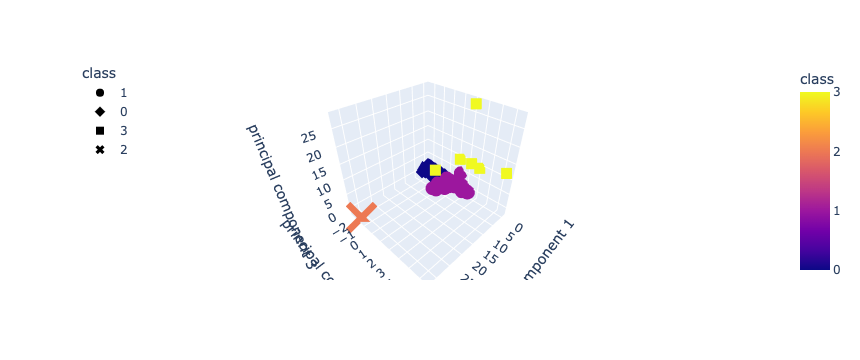

In [75]:
# Create a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    crypto_pca_df,
    x="principal component 1",
    y="principal component 2",
    z="principal component 3",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

#### Table of Tradable Cryptocurrencies

In [86]:
# Table with tradable cryptos
crypto_df2.dropna(inplace =True)
crypto_df2 = crypto_df2[crypto_df2[:] != "N/A"]
crypto_df2 = crypto_df2[crypto_df2.TotalCoinsMined > 0]

crypto_df2['TotalCoinSupply'] = crypto_df2['TotalCoinSupply'].astype(float)
crypto_df2["CoinName"]
crypto_df2 = crypto_df2[crypto_df2.TotalCoinSupply > 0]
tradable_crypto = crypto_df2.loc[:,["CoinName", "TotalCoinsMined", "TotalCoinSupply"]]
tradable_crypto


,CoinName,TotalCoinsMined,TotalCoinSupply
0,42 Coin,4.199995e+01,4.200000e+01
2,404Coin,1.055185e+09,5.320000e+08
5,EliteCoin,2.927942e+10,3.141593e+11
7,Bitcoin,1.792718e+07,2.100000e+07
9,Litecoin,6.303924e+07,8.400000e+07
...,...,...,...
1238,ZEPHYR,2.000000e+09,2.000000e+09
1242,Gapcoin,1.493105e+07,2.500000e+08
1245,Beldex,9.802226e+08,1.400223e+09
1246,Horizen,7.296538e+06,2.100000e+07


In [87]:
# Print the total number of tradable cryptocurrencies
tradable_crypto = tradable_crypto.loc[:,["TotalCoinsMined","TotalCoinSupply"]]
tradable_crypto.head()

,TotalCoinsMined,TotalCoinSupply
0,4.199995e+01,4.200000e+01
2,1.055185e+09,5.320000e+08
5,2.927942e+10,3.141593e+11
7,1.792718e+07,2.100000e+07
9,6.303924e+07,8.400000e+07


#### Scatter Plot with Tradable Cryptocurrencies

In [96]:
# Scale data to create the scatter plot
tradable_crypto_scaled = StandardScaler().fit_transform(tradable_crypto)
tradable_crypto_df = pd.DataFrame(data=tradable_crypto_scaled, columns=["TotalCoinsMined","TotalCoinSupply"])
tradable_crypto_df["CoinName"] = crypto_df2["CoinName"]
tradable_crypto_df.head()

,TotalCoinsMined,TotalCoinSupply,CoinName
0,-0.111155,-0.158292,42 Coin
1,-0.088570,-0.150687,NaN
2,0.515537,4.332395,404Coin
3,-0.110771,-0.157992,NaN
4,-0.109805,-0.157091,NaN


In [97]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"

# Plotting the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
tradable_crypto_df.hvplot.scatter(
    x="TotalCoinsMined",
    y="TotalCoinSupply",
    hover_cols=["CoinName"],
    by="CoinName",
)

:NdOverlay   [CoinName]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)